# Social Network Modeling with the Power Iteration Method

Model social networks using graph theory to uncover properties of people in the network.

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
from py2cytoscape.cytoscapejs import viewer as cyjs
from py2cytoscape import cyrest
# from py2cytoscape.data.cyrest_client import CyRestClient
from pyvis.network import Network

%matplotlib inline

<IPython.core.display.Javascript object>

### Load data

Link: http://snap.stanford.edu/data/facebook.tar.gz

In [2]:
cwd = os.getcwd()

data = pd.read_csv(cwd + '/data/facebook_combined.txt', sep=" ", header=None)
data.columns = ["Source", "Target"]

data.shape

(88234, 2)

Here we show 15 random entries from the table.

In [3]:
data.sample(15)

,Source,Target
33755,1559,1864
47207,2037,2154
73422,2793,3355
69601,2675,3411
42828,1962,2172
38020,1765,1782
59762,2239,2588
26748,1291,1736
84655,3516,3562
16053,1006,1390


### Helper methods

In [ ]:
def 

## Visualize graph

Create graph using pyvis

In [4]:
net = Network(height="750px", width="100%", bgcolor="#222222",
              font_color="white")

# set the physics layout of the network
net.barnes_hut()

In [34]:
edge_data = zip(data['Source'], data['Target'])

for e in edge_data:
    src = e[0]
    dst = e[1]

    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    
neighbor_map = net.get_adj_list()

for node in net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])
    
net.show("socialnetwork.html")

TypeError: unsupported operand type(s) for +=: 'int' and 'str'

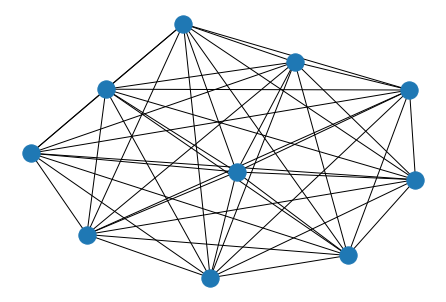

## Simple Example

Just as the PageRank algorithm ranks websites' importance based on the network formed by individual sites, we can rank the "importance" of certain individuals in a social network. We can think of this person as a sort of "influencer" - someone whose words carry a lot of weight, much like a social media influencer.

Let's first try with a relatively small graph with 10 nodes and __ edges.

In [41]:
g = Network(notebook=True)
nxg = nx.complete_graph(10)
g.from_nx(nxg)

g.show("simplenet.html")

In [ ]:
def power_iteration(A, max_iter=5):
    v = np.ones(A.shape[1]) / A.shape[1]
    
    for i in range(max_iter):
        v = np.vstack((v, (A @ v[-1]) / np.linalg.norm(A @ v[-1])))
        
    return v

### Resources